In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv("StudentsPerformance.csv")
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df1.columns = df1.columns.str.replace(' ', '_')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df1['test_preparation_course']=df1['test_preparation_course'].replace(to_replace='none', value=None)
df1.isnull().sum()

gender                           0
race/ethnicity                   0
parental_level_of_education      0
lunch                            0
test_preparation_course        642
math_score                       0
reading_score                    0
writing_score                    0
dtype: int64

In [11]:
df1['test_preparation_course'] = df1['test_preparation_course'].fillna(value='Incomplete')
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,Incomplete,90,95,93
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44
4,male,group C,some college,standard,Incomplete,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,Incomplete,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


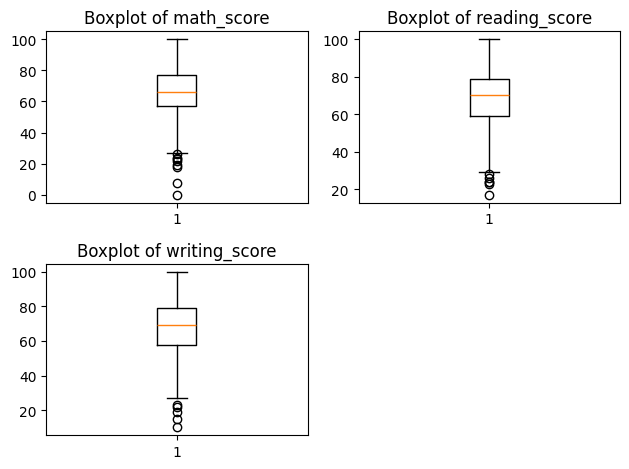

In [13]:
def Outliers():
    for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
        plt.subplot(2,2,i+1)
        plt.boxplot(df1[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
Outliers()

In [15]:
numeric_cols=df1.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    df1 = df1[(df1[col]>=lower)&(df1[col]<=upper)]
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,Incomplete,90,95,93
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44
4,male,group C,some college,standard,Incomplete,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,Incomplete,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


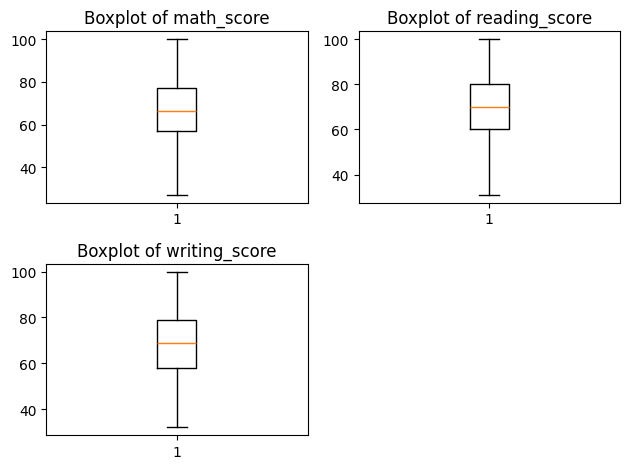

In [17]:
Outliers()

In [19]:
df1['math_score'].skew()

-0.02597374258403439

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create scalers
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Apply Min-Max Scaling
df1['math_score_minmax'] = minmax_scaler.fit_transform(df1[['math_score']])


# Display first few rows
df1


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_minmax
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74,0.616438
1,female,group C,some college,standard,completed,69,90,88,0.575342
2,female,group B,master's degree,standard,Incomplete,90,95,93,0.863014
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44,0.273973
4,male,group C,some college,standard,Incomplete,76,78,75,0.671233
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.835616
996,male,group C,high school,free/reduced,Incomplete,62,55,55,0.479452
997,female,group C,high school,free/reduced,completed,59,71,65,0.438356
998,female,group D,some college,standard,completed,68,78,77,0.561644


In [23]:
# Apply Z-score Normalization
df1['math_score_zscore'] = zscore_scaler.fit_transform(df1[['math_score']])
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_minmax,math_score_zscore
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74,0.616438,0.370131
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.160831
2,female,group B,master's degree,standard,Incomplete,90,95,93,0.863014,1.625930
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44,0.273973,-1.374034
4,male,group C,some college,standard,Incomplete,76,78,75,0.671233,0.649197
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.835616,1.486397
996,male,group C,high school,free/reduced,Incomplete,62,55,55,0.479452,-0.327535
997,female,group C,high school,free/reduced,completed,59,71,65,0.438356,-0.536835
998,female,group D,some college,standard,completed,68,78,77,0.561644,0.091065


In [25]:
df1.describe()

,math_score,reading_score,writing_score,math_score_minmax,math_score_zscore
count,986.000000,986.000000,986.000000,986.000000,9.860000e+02
mean,66.694726,69.723124,68.648073,0.543763,-4.720137e-16
std,14.340780,13.910716,14.427092,0.196449,1.000507e+00
min,27.000000,31.000000,32.000000,0.000000,-2.769366e+00
25%,57.000000,60.000000,58.000000,0.410959,-6.763681e-01
50%,66.500000,70.000000,69.000000,0.541096,-1.358538e-02
75%,77.000000,80.000000,79.000000,0.684932,7.189639e-01
max,100.000000,100.000000,100.000000,1.000000,2.323596e+00


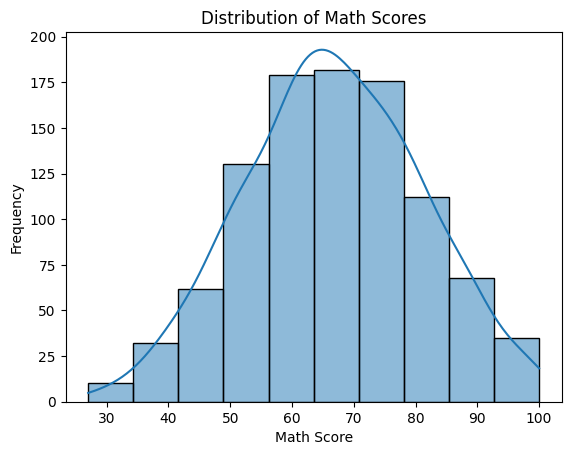

In [27]:
sns.histplot(df1['math_score'], bins=10, kde=True)  # `kde=True` adds a smooth density curve
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.show()

<Axes: xlabel='math_score', ylabel='Density'>

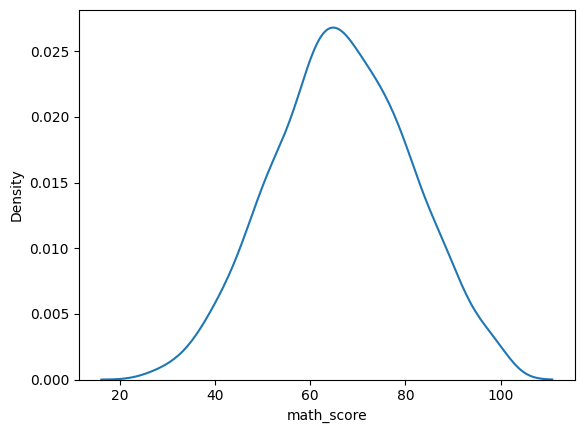

In [29]:
sns.kdeplot(df1['math_score'])

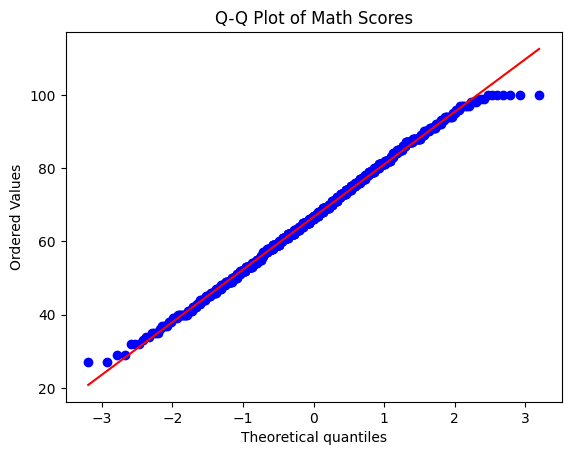

In [31]:
import scipy.stats as stats

stats.probplot(df1['math_score'], dist="norm", plot=plt)

plt.title("Q-Q Plot of Math Scores")
plt.show()


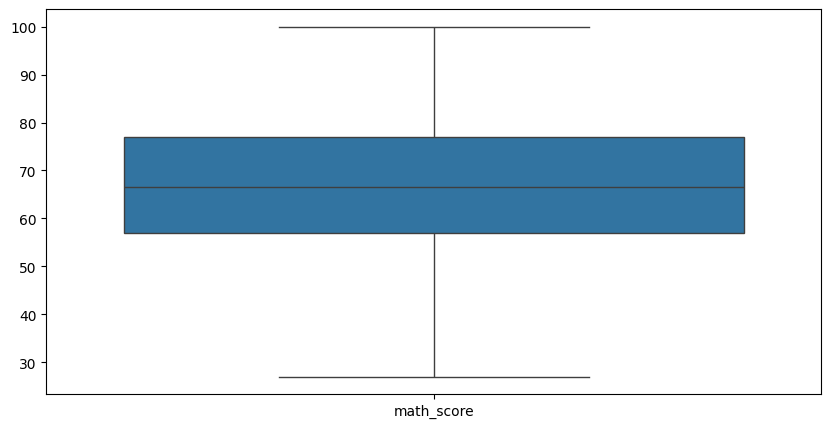

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1[['math_score']])
plt.show()
